In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [28]:
import os
import cv2
import numpy as np

# Path to the dataset directory
dataset_dir = '/kaggle/input/pc-parts-images-dataset-classification/pc_parts'

# Initialize lists to store images and labels
images = []
labels = []

# # Iterate over each folder (class) in the dataset directory
for class_name in os.listdir(dataset_dir):
    class_dir = os.path.join(dataset_dir, class_name)
#     print(class_dir+' '+class_name+' '+dataset_dir)
#     # Iterate over each image in the class directory
    for filename in os.listdir(class_dir):
        img_path = os.path.join(class_dir, filename)
#         # Read the image using OpenCV
        img = cv2.imread(img_path)
#         # Append the image to the images list
        images.append(img)
#         # Append the label (class) to the labels list
        labels.append(class_name)

# Convert lists to NumPy arrays
images = np.array(images)
labels = np.array(labels)

# # Print the number of images and unique labels
print("Number of images:", len(images))
print("Unique labels:", np.unique(labels))

Number of images: 3279
Unique labels: ['cables' 'case' 'cpu' 'gpu' 'hdd' 'headset' 'keyboard' 'microphone'
 'monitor' 'motherboard' 'mouse' 'ram' 'speakers' 'webcam']


In [29]:
print(images.shape)

(3279, 256, 256, 3)


In [30]:
grayscale_images=np.empty((images.shape[0],images.shape[1],images.shape[2]),dtype=np.uint8)

for i,img in enumerate(images):
    grayimage=cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    grayscale_images[i]=grayimage

In [31]:
print(grayscale_images.shape)

(3279, 256, 256)


In [34]:
print(labels[102])

microphone


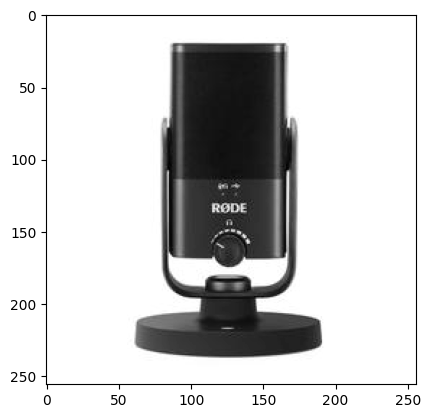

In [32]:
import matplotlib.pyplot as plt
img_plot=plt.imshow(grayscale_images[102],cmap='gray')
plt.show()

In [35]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(grayscale_images,labels, test_size=0.2, random_state=42)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(2623, 256, 256)
(2623,)
(656, 256, 256)
(656,)


In [1]:
1+1

2